In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

# 1D Random Walk

N random steps with values **-1,1** are generated with equal probability.

In [2]:
N = 10**4
steps = 2*np.random.randint(0, high = 2, size = N) - 1
position=np.cumsum(steps)

In [3]:
print(f'Maximum distance = {position.max()} at {position.argmax()}th step')
print(f'Minimum distance = {position.min()} at {position.argmin()}th step')

Maximum distance = 48 at 1349th step
Minimum distance = -37 at 6430th step


In [4]:
print(f' x = 20 reached at steps {np.array(np.where(position == 20))}')

 x = 20 reached at steps [[1035 1037 1043 1045 1049 1051 1053 1059 1061 1063 1073 1075 1083 1119
  1123 1125 1131 1133 1135 1137 1139 1143 1145 1147 1167 1515 1521 1523
  1525 1537 1539 1595 1639 1715 1745 1883 1885 1887 1889 1921 1923 1925
  1929 1939 1941 1977 1979 2011 2013 2015 2017 2019 2021 2023 2025 2031
  2035 2039 4349 4351 4353 4355 4395 4397 4417 4419 4421 4423 5007 5009
  5019 5075 5077]]


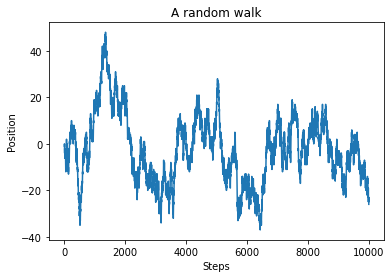

In [5]:
%matplotlib inline
plt.title('A random walk')
plt.ylabel('Position')
plt.xlabel('Steps')
plt.plot(position)
plt.show()

<IPython.core.display.Javascript object>


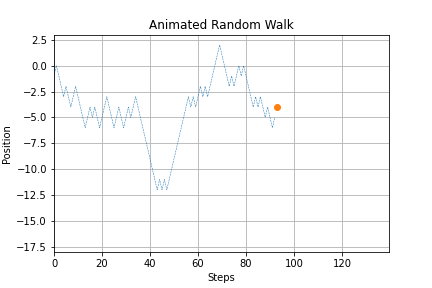

In [7]:
%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, N), ylim=(1.1*position.min(),1.1*position.max()))
ax.grid()
ax.set_xlabel('Steps')
ax.set_ylabel("Position")

plt.title('Animated Random Walk')

index=np.asarray(np.linspace(0,N,N))
line = ax.plot(index[0], position[0], '--', lw=0.5)
ball = ax.plot(index[0], position[0], 'o', lw=0.5)

def update_plots(i):
    
    # Draw the i-th position
    line[0].set_data(index[:i], position[:i])
    ball[0].set_data(index[i], position[i])
    ax.set_xlim(left=0, right=i*1.5)
    ax.set_ylim(bottom = position[:i].min()*1.5, top = position[:i].max()*1.5)
    
    # Return a tuple
    return line[0],

anim = animation.FuncAnimation(fig, update_plots, np.arange(1, len(position)), interval=1, blit=True, repeat=True)
plt.show()

# Statistics on 1D Random Walk

Now we generate N different random walks of N steps in the same way as before.

In [8]:
N = 10**3
steps = 2*np.random.randint(0,high = 2,size = (N,N)) -1
positions=np.cumsum(steps,axis=1)

In [9]:
max=(positions.max(axis=1)).max()
print(f'The {(positions.max(axis=1)).argmax()}-th walker went the furthest reaching {max}')

The 525-th walker went the furthest reaching 127


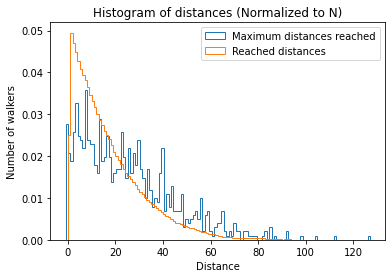

In [10]:
%matplotlib inline

n, bins, patches = plt.hist(positions.max(axis=1),bins=max,histtype = 'step', density = True, label = 'Maximum distances reached' )
n, bins, patches = plt.hist(abs(positions.flatten()),bins=max,histtype = 'step', density = True, label = 'Reached distances')

plt.xlabel('Distance')
plt.ylabel('Number of walkers')
plt.title('Histogram of distances (Normalized to N)')
plt.legend()
plt.show()

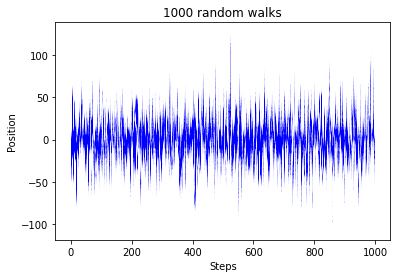

In [11]:
plt.title(f'{N} random walks')
plt.ylabel('Position')
plt.xlabel('Steps')
plt.plot(positions, lw = 0.012,alpha = 0.08, color = 'blue')
plt.show()

<IPython.core.display.Javascript object>


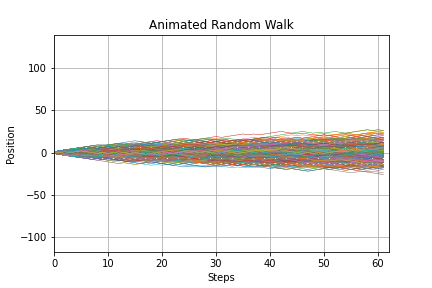

In [12]:
%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, N), ylim=(1.1*positions.min(),1.1*positions.max()))
ax.grid()
ax.set_xlabel('Steps')
ax.set_ylabel("Position")
plt.title('Animated Random Walk')


lines = [ax.plot(index[0], positions[j,0], '-', lw=0.5)[0] for j in range(N)]
def update_plots(i):
    # Draw the i-th position
    for j in range(N):
        lines[j].set_data(index[:i], positions[j,:i])
        ax.set_xlim(left=0, right=index[i])
        # Return a tuple
    return lines,

anim = animation.FuncAnimation(fig, update_plots, np.arange(1, N), interval=0.1, blit=True, repeat=True)
plt.show()

## Experiment with gaussian noise

Until now the only possible values for the steps where : 
- +1 with 50% probability
- -1 with 50% probability 

Now we want to dirten up those possibility by adding a gaussian noise.

In [13]:
N = 1000
steps_new = 2*np.random.randint(0,high = 2,size = N) -1
position=np.cumsum(steps_new)

mu = 0
sigma = 0.1
noise = np.random.normal(loc = mu, scale = sigma, size = N)

strength = 1
steps_noise = steps_new + strength*noise
position_noise = np.cumsum(steps_noise)

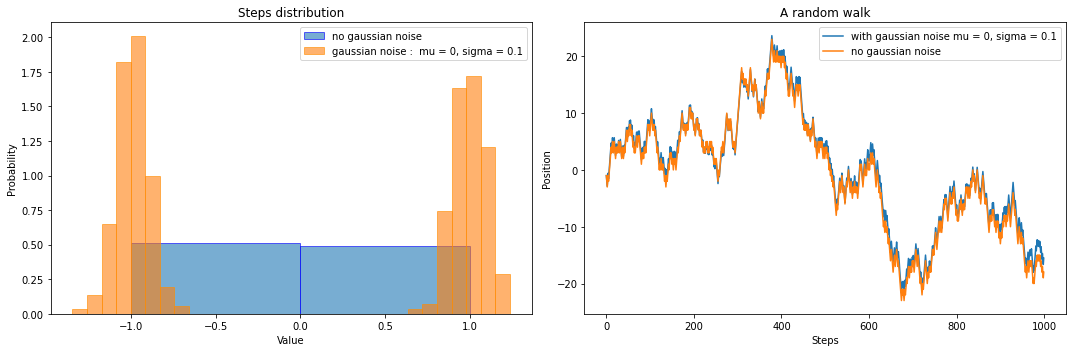

In [14]:
%matplotlib inline

plt.figure(figsize = (15,5))

plt.subplot(121)
plt.title('Steps distribution')
plt.ylabel('Probability')
plt.xlabel('Value')
_ = plt.hist(steps_new, bins = 2, density = True, alpha = 0.6, 
             label = 'no gaussian noise', edgecolor = 'blue')
_ = plt.hist(steps_noise, bins = 30, density = True, alpha = 0.6, 
             label = 'gaussian noise :  mu = {0}, sigma = {1}'.format(mu, sigma)
            , edgecolor = 'darkorange')
plt.legend()


plt.subplot(122)
plt.title('A random walk')
plt.ylabel('Position')
plt.xlabel('Steps')
plt.plot(position_noise, label = 'with gaussian noise mu = {0}, sigma = {1}'.format(mu, sigma))
plt.plot(position, label = 'no gaussian noise')
plt.legend()
plt.tight_layout()
plt.show()

#  3D Random Walks

The next step is to generalize the procedure above in 3 dimensions. We want to generate 3d random steps in *three different ways*:

- Only **+1, -1** in the three directions
- **+1 , -1 and 0** in the three directions
- Uniform probability in all the solid angle

To make everything easier, we could define 3 functions to implement those methods.

In [84]:
def GenerateSteps(method, N, d):
    
    # Only +1, -1 in the three directions
    if method == 'one':
        return 2*np.random.randint(0,high = 2,size = (N, N, d)) -1
    
    # +1 , -1 and 0 in the three directions
    elif method == 'two':
        return np.random.randint(-1,high = 2,size = (N, N, d))
    
    # Uniform probability in all the solid angle
    elif method == 'three':
        phi = np.random.uniform(low = 0., high = 2*np.pi, size = (N*N))
        costheta = np.random.uniform(low = -1., high = 1., size = (N*N))
        x = np.cos(phi)*np.sin(np.arccos(costheta))
        y = np.sin(phi)*np.sin(np.arccos(costheta))
        z = costheta
        return np.array(list(zip(x,y,z))).reshape(N,N,d)

In [97]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

N = 1000
d = 3
method = 'three'
steps3d = GenerateSteps(method, N, d)
position3d = np.cumsum(steps3d, axis = 1)

<IPython.core.display.Javascript object>


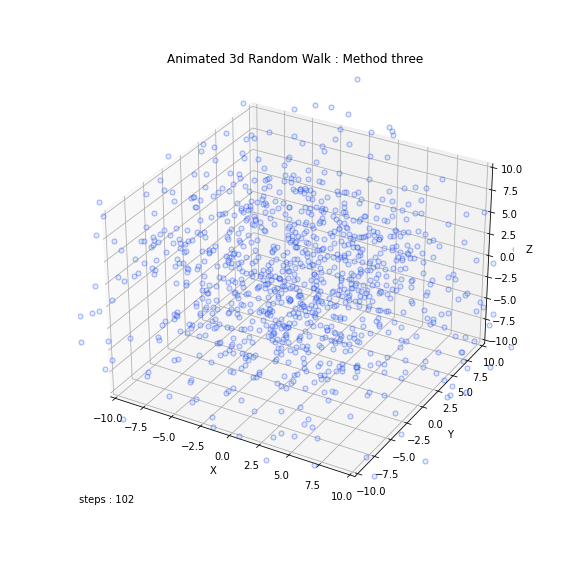

In [99]:
%matplotlib notebook

fig = plt.figure(figsize = (8,8))
ax= fig.add_subplot(projection="3d")
lim = N/100
ax.set(xlim3d=(-lim, lim), xlabel='X')
ax.set(ylim3d=(-lim, lim), ylabel='Y')
ax.set(zlim3d=(-lim, lim), zlabel='Z')
ax.grid()
plt.title('Animated 3d Random Walk : Method ' + method)


lines = [ax.plot([], [], [],  '.', markersize = 10, color = 'skyblue', 
                 markeredgecolor = 'blue', alpha = 0.3)[0] for _ in position3d]

info_template = 'steps : %d'
info_text = ax.text(0.05, 0.95,0,'', transform=ax.transAxes)

def update_plots(i, position3d, lines):
    for j in range(N):
        # NOTE: there is no .set_data() for 3 dim data...
        lines[j].set_data(position3d[j,i:i+1, :2].T)
        lines[j].set_3d_properties(position3d[j,i:i+1, 2])
        info_text.set_text(info_template % (i))
    return lines, info_text
anim = animation.FuncAnimation(fig, update_plots, N,fargs=(position3d, lines), interval=0.05, blit=True, repeat=True)
plt.show()